In [53]:
import math

class Preceptron:

  def __init__(self , num_inputs , thre):
    self.weights = [0.0] * num_inputs
    self.bias = 0.0
    self.thre  = thre

  def predict(self , inputs):
    weighted_sum = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias

    output = 1 / (1 + math.exp(-weighted_sum)) # Sigmoid function

    return 1 if output > self.thre else 0

  def train(self, training_data, targets, learning_rate, epochs):
    for epoch in range(epochs):
      for input, target in zip(training_data, targets):
        print(input, target)
        prediction = self.predict(input)  # Step 1
        print(prediction)
        error = target - prediction # Step 2
        print(error)
        for i in range(len(self.weights)):
          self.weights[i] += learning_rate * error * input[i]
          self.bias += learning_rate * error

In [54]:
preceptron = Preceptron(num_inputs = 2, thre = .5)

training_data = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

target = [0,0,0,1]

learning_rate = .1
epochs = 10

preceptron.train(training_data, target, learning_rate, epochs)

for inputs in training_data:
  prediction = preceptron.predict(inputs)
  print(f"inputs - {inputs} and prediction = {prediction}")

[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
0
1
[0, 0] 0
1
-1
[0, 1] 0
1
-1
[1, 0] 0
0
0
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
1
-1
[1, 0] 0
0
0
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
1
-1
[1, 0] 0
1
-1
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
1
-1
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
1
-1
[1, 1] 1
0
1
[0, 0] 0
0
0
[0, 1] 0
1
-1
[1, 0] 0
0
0
[1, 1] 1
1
0
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
1
0
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
1
0
[0, 0] 0
0
0
[0, 1] 0
0
0
[1, 0] 0
0
0
[1, 1] 1
1
0
inputs - [0, 0] and prediction = 0
inputs - [0, 1] and prediction = 0
inputs - [1, 0] and prediction = 0
inputs - [1, 1] and prediction = 1


In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [56]:
model = Sequential([
    Dense(units = 40, activation = 'relu', input_shape = (10, )),
    Dense(units = 20, activation = 'sigmoid'),
    Dense(units = 20, activation = 'sigmoid'),
    Dense(units = 20, activation = 'sigmoid'),
    Dense(units = 20, activation = 'sigmoid'),
    Dense(units = 20, activation = 'sigmoid'),
    Dense(units = 2, activation = 'sigmoid')
])

c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer = 'adam', loss = 'MSE', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 40)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,982 (11.65 KB)

 Trainable params: 2,982 (11.65 KB)

 Non-trainable params: 0 (0.00 B)

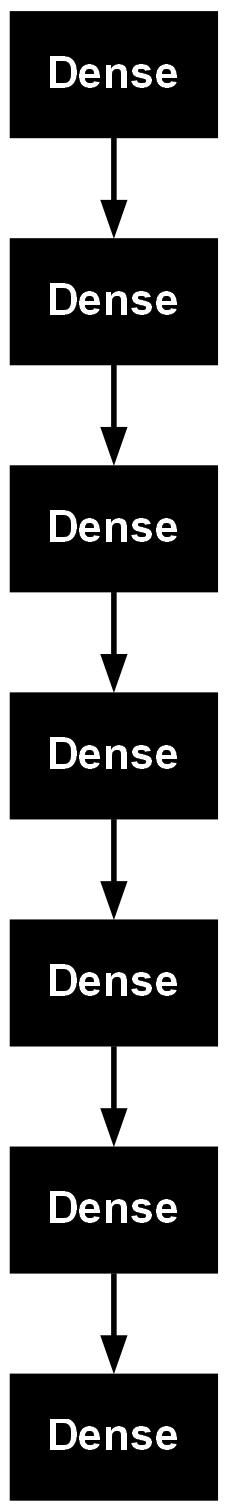

In [59]:
from keras.utils import plot_model
plot_model(model)

In [60]:
from sklearn.datasets import load_iris
data = load_iris()
x = data.data
y = data.target

In [61]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
model = Sequential([
    Dense(6, 'relu', input_shape = (4, )),
    Dense(3, 'softmax')
])

In [63]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
x.shape

(150, 4)

In [65]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [66]:
model.fit(x, y, epochs = 100, batch_size = 10, verbose = 1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3040 - loss: 1.9327  
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3600 - loss: 1.5300 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3448 - loss: 1.3958 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2907 - loss: 1.3350 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3451 - loss: 1.1526 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.1009 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2570 - loss: 1.0807     
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3677 - loss: 0.9782 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4223 - loss: 0.9454 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 0.9328 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 0.9146 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [67]:
model.evaluate(x, y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9737 - loss: 0.2258  


[0.29789498448371887, 0.9666666388511658]

In [68]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


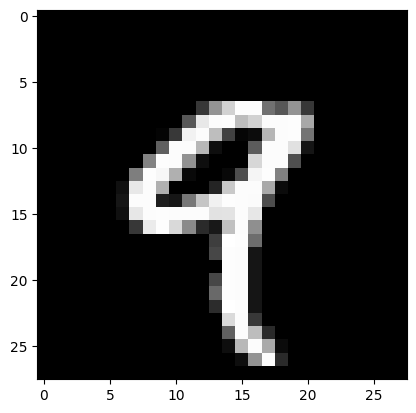

In [69]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4], cmap = 'gray')
print(y_train[0])
plt.show()

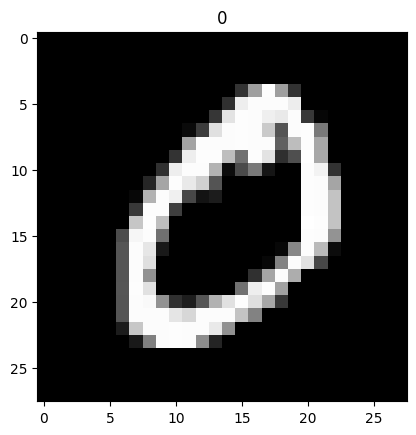

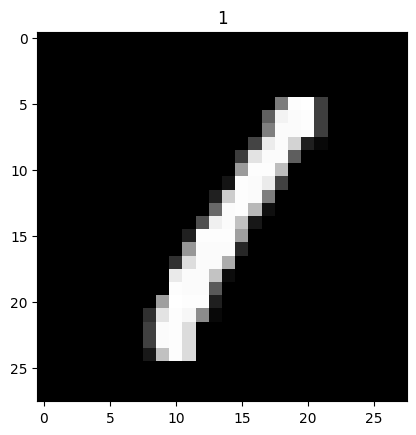

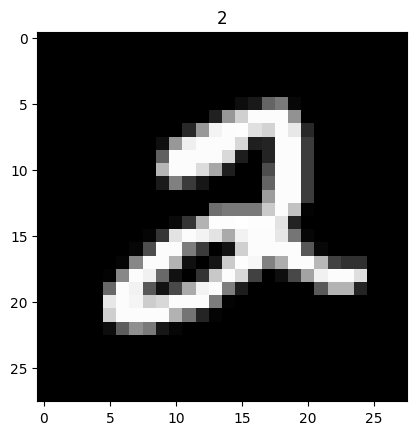

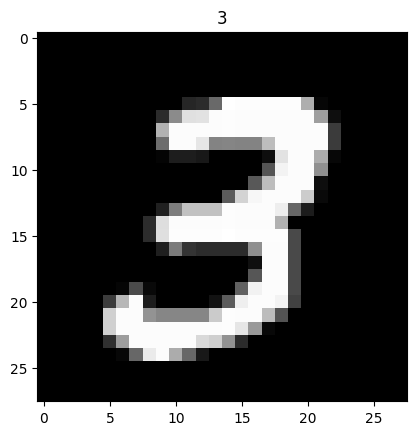

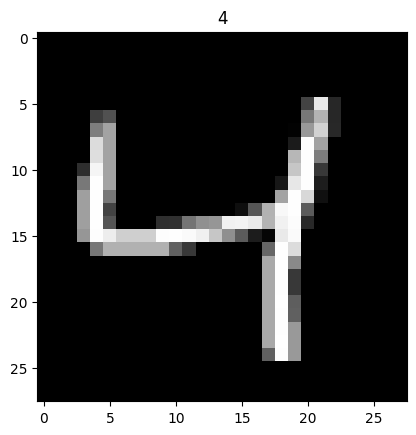

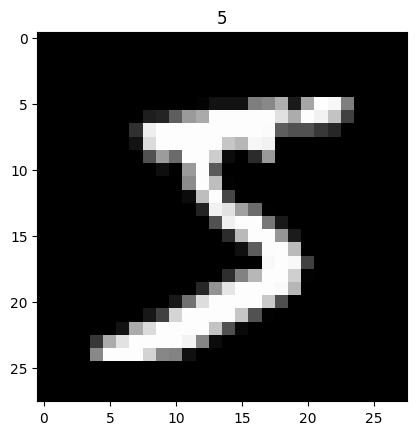

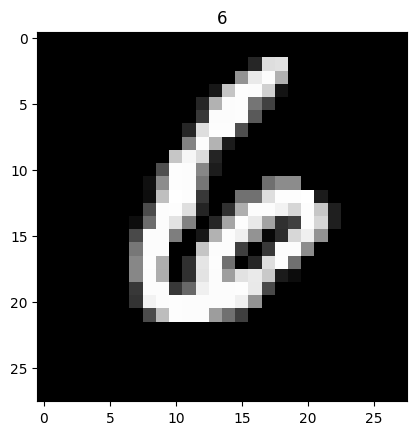

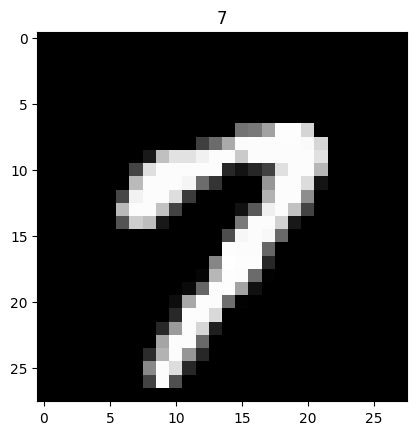

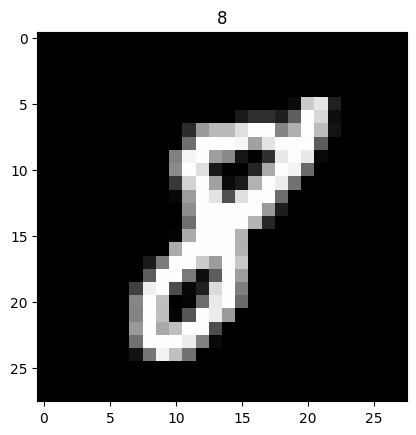

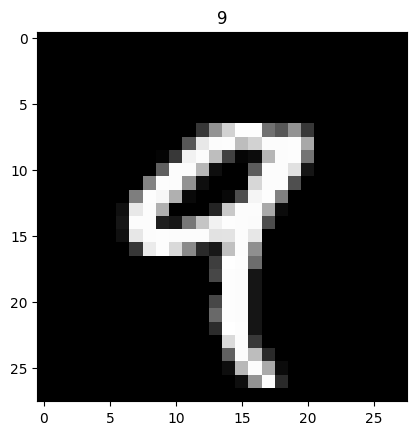

In [70]:
labels = set(y_train)
for label in labels:
  image_index = next(i for i in range(len(y_train)) if y_train[i] == label)
  image = x_train[image_index]
  plt.imshow(image, cmap = 'gray')
  plt.title(label)
  plt.show()

In [71]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [72]:
x_train = x_train / 255
x_test = x_test / 255

In [73]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import regularizers

In [74]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [75]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [76]:
model = Sequential([
    Flatten(input_shape = (28,28)), # Input layers
    Dense(128, activation = 'relu', kernel_regularizer = regularizers.L1L2(l1 = 1e-5, l2 = 1e-4)),
    Dropout(.2),
    Dense(10, activation = 'softmax') # sigmoid # output layer
])

c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [78]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
import tensorflow

In [80]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss', patience = 3, restore_best_weights = True)

In [81]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1629 - loss: 2.4181


[2.430586576461792, 0.1492999941110611]

In [83]:
model.save('mnist_model.h5')

In [84]:
model.get_weights()

[array([[ 0.05141198, -0.01855156,  0.00852278, ..., -0.03099688,
         -0.04645417,  0.0679244 ],
        [ 0.07035229, -0.04483531, -0.02175371, ...,  0.08081549,
          0.07655766,  0.07768538],
        [-0.03410822,  0.03422485,  0.06526885, ...,  0.03436428,
         -0.03086694,  0.02450971],
        ...,
        [-0.01841988,  0.07361426,  0.03853079, ..., -0.02073793,
         -0.06518953, -0.04573046],
        [-0.0241885 , -0.05743937,  0.04677211, ...,  0.0185186 ,
         -0.00624266, -0.03289878],
        [ 0.00380595, -0.01368183,  0.05073572, ..., -0.02536812,
         -0.06090522, -0.07614241]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

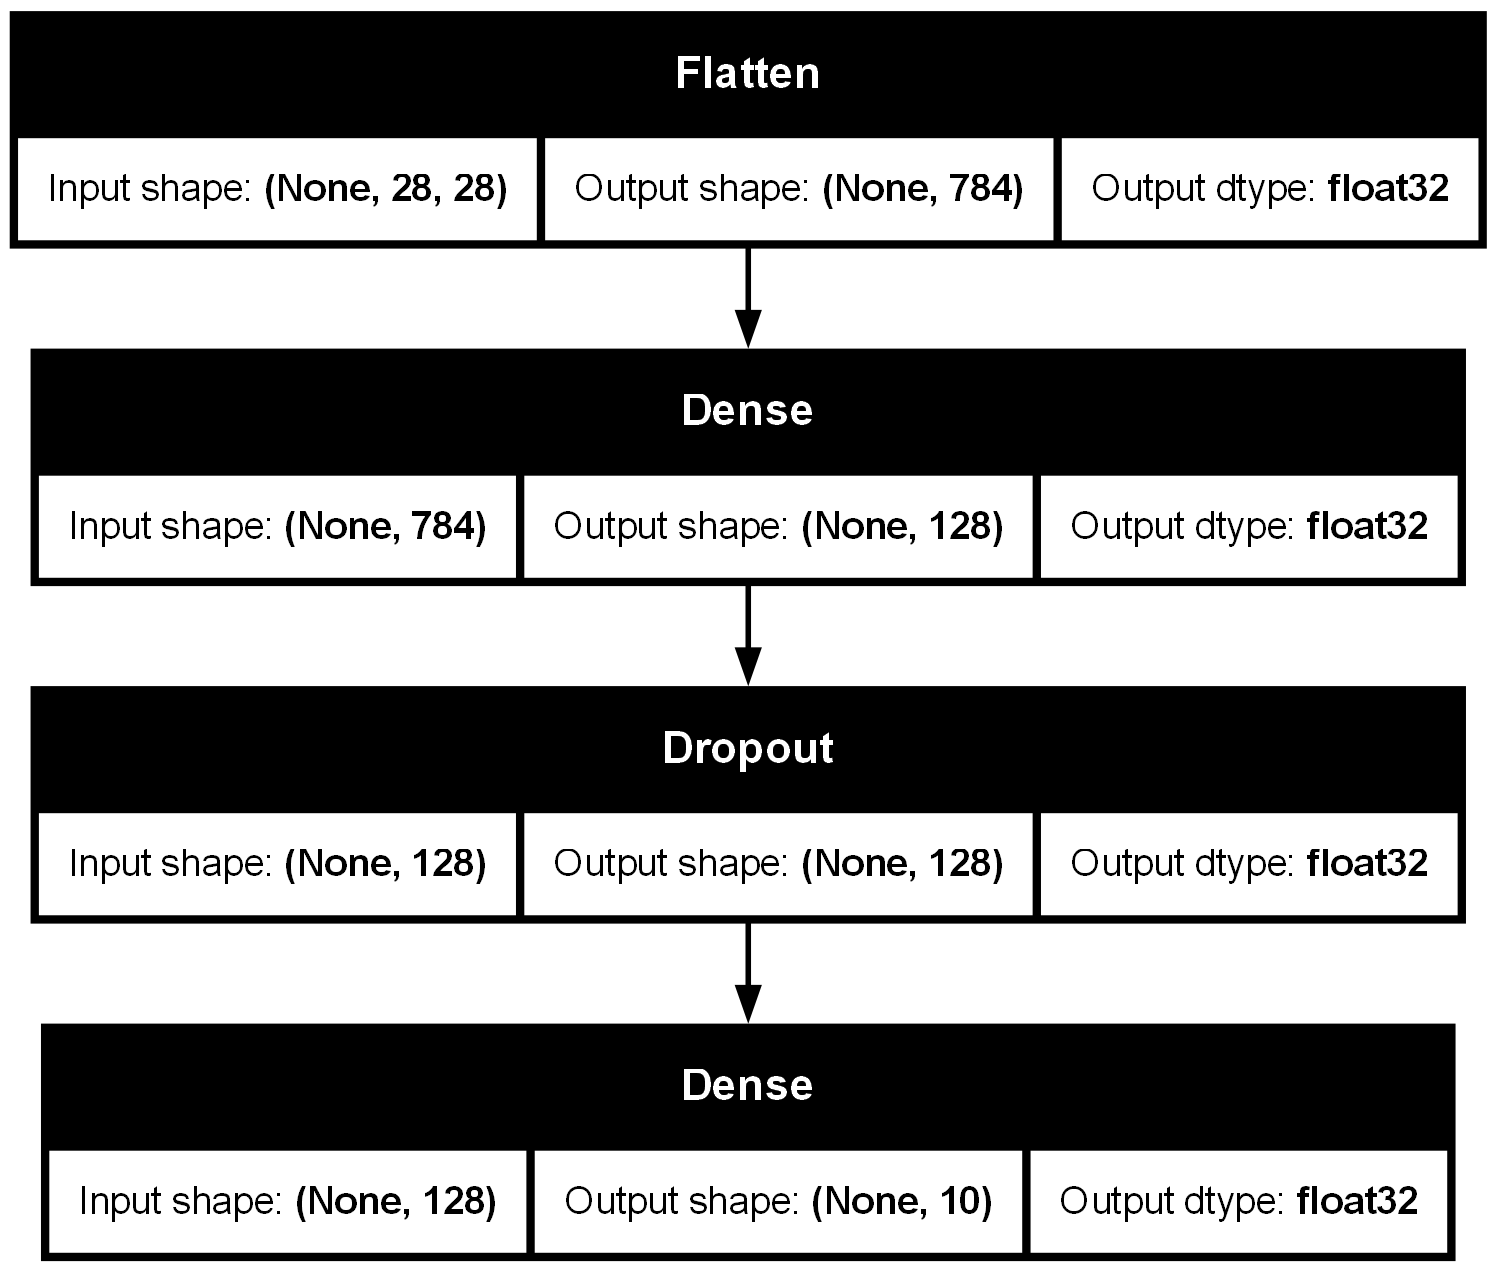

In [85]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes= True, show_dtype = True)

In [86]:
def build_model(hp):
  model = Sequential()
   
  model.add(Flatten(input_shape = (28, 28))) # Input layers
   
  for i in range(hp.Int('num_layers', min_value = 1, max_value = 4)): # Range(1, 4)
    model.add(Dense(units = hp.Int("units_" + str(i), min_value = 1, max_value = 800, step = 50), activation = hp.Choice("act_" + str(i), ['relu', 'tanh'])))
     
    # Dense(128, activation = 'relu'), h1
    # # Dense(64, activation = 'tanh'), h2
    # # Dense(20, activation = 'relu'), h3
     
    model.add(Dense(10, activation = hp.Choice("output_activation", ['softmax', 'sigmoid']))) # Output layer
    model.compile(loss = 'categorical_crossentropy', optimizer = hp.Choice("optimizr", ['adam', 'rmsprop', 'nag']), metrics = ['accuracy'])
     
    return model

In [87]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    max_trials = 5,
    objective = 'val_accuracy',
    executions_per_trial = 1
)

In [88]:
tuner.search(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

Trial 5 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.9825000166893005
Total elapsed time: 00h 02m 02s


In [89]:
models = tuner.get_best_models(num_models = 1)[0]

c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [90]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten, concatenate

In [92]:
input_layer = Input(shape = (28, 28))

hidden_11 = Dense(128, activation = 'relu')(input_layer)
hidden_12 = Dense(32, activation = 'relu')(hidden_11)

hidden_21 = Dense(64, activation = 'relu')(input_layer)

merge = concatenate([hidden_12, hidden_21])

output_layer = Dense(10, activation = 'softmax')(merge)

In [93]:
model = Model(inputs = [input_layer], outputs = output_layer)

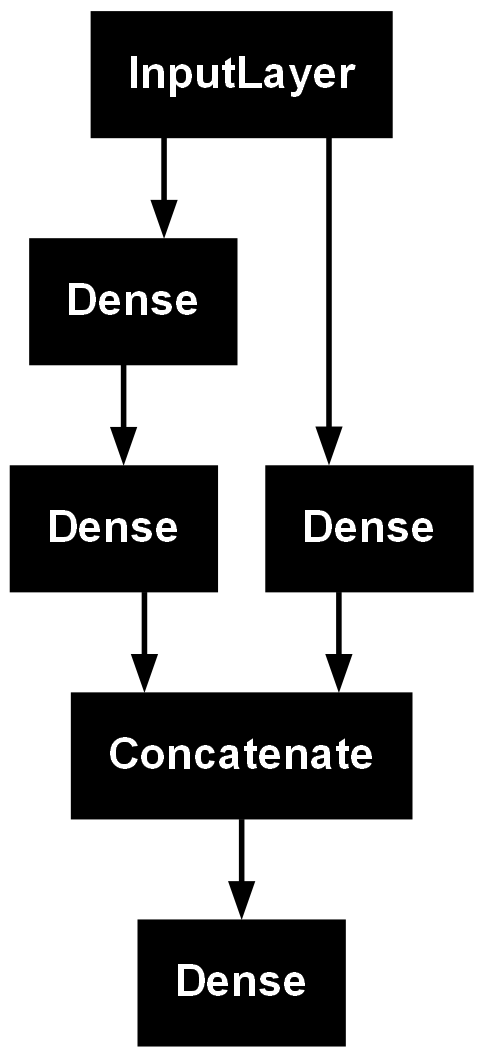

In [94]:
from keras.utils import plot_model

plot_model(model)

# FCNN Mini Project

In [95]:
import pandas as pd
df = pd.read_csv('bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [97]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


array([[<Axes: title={'center': 'duration'}>]], dtype=object)

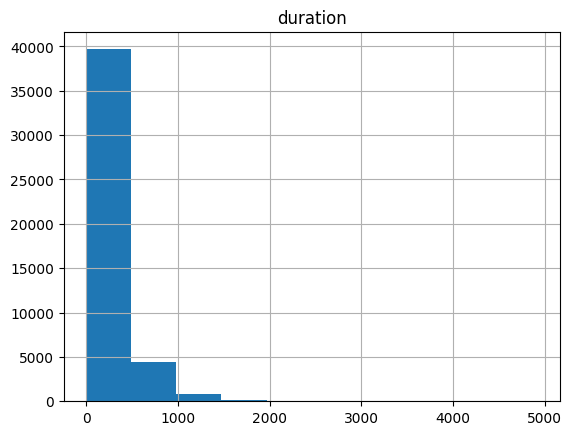

In [98]:
df.hist('duration')

In [99]:
df.select_dtypes(include = 'object').head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes(include = 'object').columns:
  df[i] = le.fit_transform(df[i])

In [101]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [102]:
x = df.iloc[ :, :-1]
y = df.iloc[ :,-1]

In [103]:
x.shape

(45211, 16)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42) # Seq - How to choose test size in train test split ?

In [105]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(64 , activation = 'relu', input_shape = (x_train.shape[1], )),
    Dense(1 , activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.fit(x_train, y_train , epochs = 10, batch_size = 32, validation_split = .2)

Epoch 1/10


905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7706 - loss: 5.0985 - val_accuracy: 0.8152 - val_loss: 0.7814
Epoch 2/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8528 - loss: 0.9772 - val_accuracy: 0.8826 - val_loss: 1.8668
Epoch 3/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8493 - loss: 1.0498 - val_accuracy: 0.8850 - val_loss: 1.7533
Epoch 4/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8586 - loss: 1.2128 - val_accuracy: 0.8092 - val_loss: 0.8153
Epoch 5/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8599 - loss: 0.9058 - val_accuracy: 0.8846 - val_loss: 0.8953
Epoch 6/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8592 - loss: 0.9348 - val_accuracy: 0.7935 - val_loss: 2.8605
Epoch 7/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8490 - loss: 0.9824 - val_accuracy: 0.8828 - val_loss: 0.4851
Epoch 8/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8601 - loss: 1.0077 - val_accuracy: 0.8868 - val_

In [108]:
# Data Improvment
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [109]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [110]:
df = df[~((df['job'] == 'unknown') & (df['y'] == 'no'))]

<Axes: >

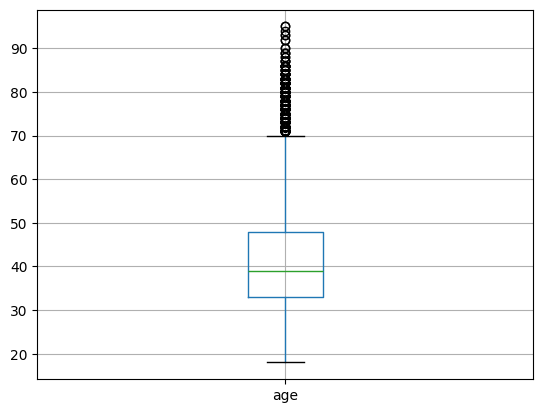

In [111]:
df.boxplot('age')

In [112]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in df.select_dtypes(exclude = 'object').columns:
  df[[i]] = ss.fit_transform(df[[i]])

In [113]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898,-0.363983


In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes(include = 'object').columns:
  df[i] = le.fit_transform(df[i])

In [115]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,-0.103820,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
3,0.571051,-1.020516,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
4,-0.747384,2.035139,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.25194,0.444898,-0.363983


In [116]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (x_train.shape[1], )),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train , epochs = 10, batch_size = 32, validation_split = .2)

Epoch 1/10


c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7587 - loss: 29.0068 - val_accuracy: 0.8665 - val_loss: 0.4381
Epoch 2/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8551 - loss: 1.1169 - val_accuracy: 0.7889 - val_loss: 0.7832
Epoch 3/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8498 - loss: 1.0153 - val_accuracy: 0.8817 - val_loss: 1.1626
Epoch 4/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8578 - loss: 1.1788 - val_accuracy: 0.5560 - val_loss: 7.2372
Epoch 5/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8464 - loss: 1.5293 - val_accuracy: 0.8878 - val_loss: 0.5032
Epoch 6/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8548 - loss: 1.1780 - val_accuracy: 0.8766 - val_loss: 0.6387
Epoch 7/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8630 - loss: 0.8588 - val_accuracy: 0.8826 - val_loss: 1.0904
Epoch 8/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8684 - loss: 0.8419 - val_accuracy: 0.6912 - val

In [117]:
from tensorflow.keras.layers import BatchNormalization , Dropout
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (x_train.shape[1], )),
    BatchNormalization(),
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dropout(.2),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = .2)

Epoch 1/10


c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8767 - loss: 0.3392 - val_accuracy: 0.8866 - val_loss: 0.2688
Epoch 2/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8888 - loss: 0.2786 - val_accuracy: 0.8851 - val_loss: 0.2578
Epoch 3/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8859 - loss: 0.2750 - val_accuracy: 0.8847 - val_loss: 0.2569
Epoch 4/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8857 - loss: 0.2730 - val_accuracy: 0.8949 - val_loss: 0.2585
Epoch 5/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8862 - loss: 0.2689 - val_accuracy: 0.8901 - val_loss: 0.2501
Epoch 6/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8907 - loss: 0.2626 - val_accuracy: 0.8934 - val_loss: 0.2617
Epoch 7/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.2608 - val_accuracy: 0.8904 - val_loss: 0.2539
Epoch 8/10
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8894 - loss: 0.2555 - val_accuracy: 0.8873 - val_

In [118]:
from keras_tuner.tuners import RandomSearch
def build_model(hp):
  model = Sequential()

  for i in range(hp.Int('num_layers', min_value = 1, max_value = 4)): # Range (1, 4)
    model.add(Dense(units = hp.Int("units_" + str(i), min_value = 1, max_value = 100, step = 10), activation = 'relu', input_shape = (x_train.shape[1], ))
    )

  model.add(Dense(1, activation = 'sigmoid')) # Output layer

  model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

  return model

tuner = RandomSearch(
    build_model,
    max_trials = 5,
    objective = 'val_accuracy',
    executions_per_trial = 1
)

tuner.search(x_train, y_train, epochs = 5 , validation_split = .2)

Reloading Tuner from .\untitled_project\tuner0.json


# CNN Models

In [119]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [120]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [121]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [122]:
model = Sequential([
    Conv2D(8, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary()

c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       230,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,042 (906.41 KB)

 Trainable params: 232,042 (906.41 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [124]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3736 - loss: 1.7565
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5398 - loss: 1.3212
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5904 - loss: 1.1824
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6116 - loss: 1.1092
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6317 - loss: 1.0525
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6514 - loss: 0.9950
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6692 - loss: 0.9412
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6858 - loss: 0.9065
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6995 - loss: 0.8592
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7151 - loss: 0.8221


In [125]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6188 - loss: 1.1006


[1.1085528135299683, 0.6161999702453613]

# Optimization of CNN

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True,
    fill_mode ='nearest'
)

train_gen = train_data.flow(x_train, y_train)

In [127]:
model.fit(train_gen, epochs = 10, batch_size = 64)

Epoch 1/10
   4/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.1510 - loss: 2.9387 

c:\Users\soumy\anaconda3\envs\deeplearningenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.1034 - loss: 2.3203
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.1081 - loss: 2.3014
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.1380 - loss: 2.2663
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.2391 - loss: 2.0900
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.2841 - loss: 1.9703
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3150 - loss: 1.8966
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3340 - loss: 1.8431
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3465 - loss: 1.8154
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3534 - loss: 1.7943
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3591 - loss: 1.7807


In [128]:
model = Sequential([
    Conv2D(9, (3, 3), activation = 'relu', groups = 3, dilation_rate = (2, 2), input_shape = (32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu', padding = "same",),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 9)      │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,164 (1.56 MB)

 Trainable params: 408,164 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [130]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3470 - loss: 1.8077
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5444 - loss: 1.2919
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6011 - loss: 1.1411
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6372 - loss: 1.0336
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6660 - loss: 0.9594
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6853 - loss: 0.9035
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7041 - loss: 0.8524
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7217 - loss: 0.8011
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7359 - loss: 0.7563
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.7522 - loss: 0.7053


In [131]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6843 - loss: 0.9440


[0.9586398601531982, 0.6773999929428101]

# Create a AlexNet Architecture
### Input: 224 x 224 x 3 (color image)
### Conv (96 filters, 11 x 11) → Max Pool → Conv (256 filters, 5 x 5) →
### Max Pool → Conv (384 filters, 3 x 3) → Conv (384 filters, 3 x 3) → Conv (256 filters, 3 x 3) →
### Max Pool → FC (4096) → FC (4096) → Output (1000 classes)

In [132]:
# AlexNet Architectue
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense , Dropout
model = Sequential(
    [
        Conv2D(96, kernel_size = (11, 11), strides = 2, activation = 'relu', input_shape = (224, 224, 3)),
        MaxPooling2D((3, 3), strides = 2 ),
        Conv2D(256, (5, 5), activation = 'relu', padding = 'same'), # padding -> adding blank pixels => to capture corner parts
        MaxPooling2D((3, 3), strides = 2),
        Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(384, (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(256, (3, 3), activation = 'relu', padding= 'same'),
        MaxPooling2D((3, 3), strides = 2),
        Flatten(),
        Dense(4096, activation = 'relu'),
        Dropout(.5),
        Dense(4096, activation = 'relu'),
        Dropout(.3),
        Dense(1000, activation = 'softmax')
    ]
)

In [133]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 107, 107, 96)   │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 53, 53, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │   150,999,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,624,552 (669.95 MB)

 Trainable params: 175,624,552 (669.95 MB)

 Non-trainable params: 0 (0.00 B)

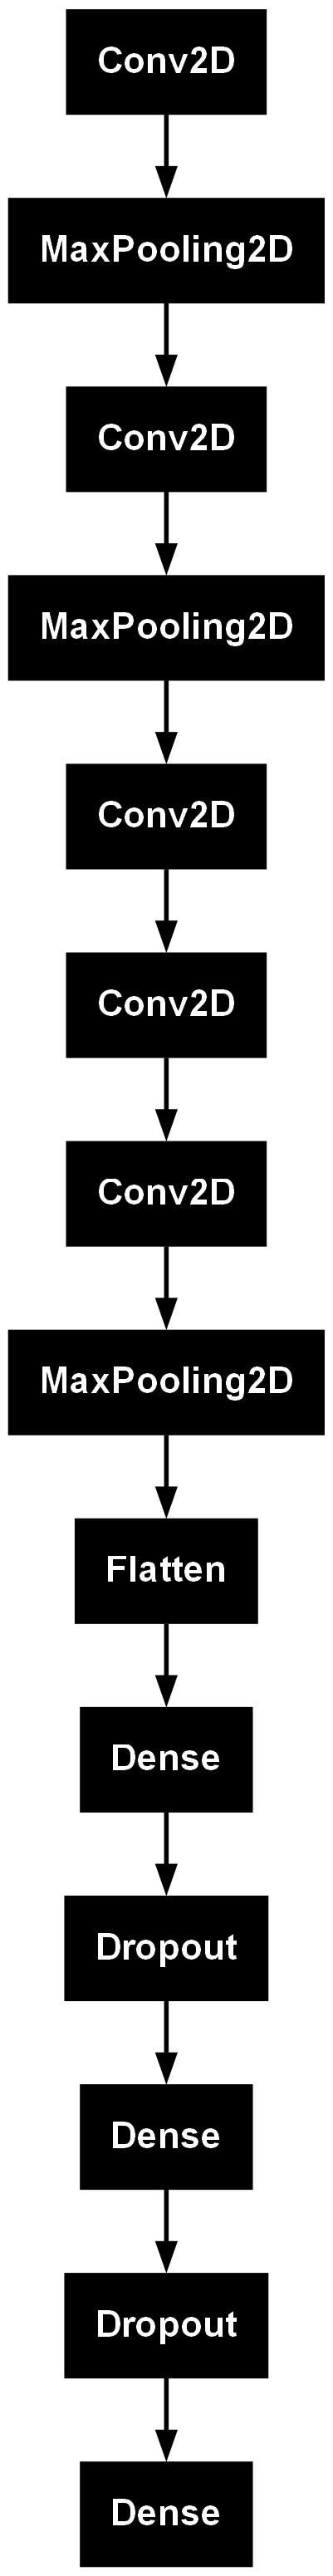

In [134]:
from keras.utils import plot_model
plot_model(model)

In [135]:
from keras.applications import VGG19 # Pre-trained model

model = VGG19()

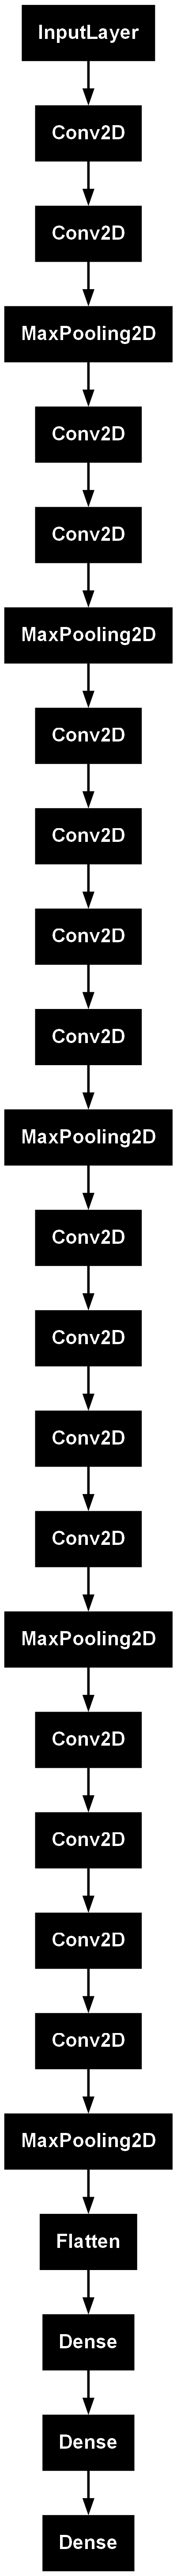

In [136]:
plot_model(model)

In [137]:
model.save('VGG19.h5')

In [138]:
from keras.applications import ResNet50 # We are taking upto 50 layers

model = ResNet50()

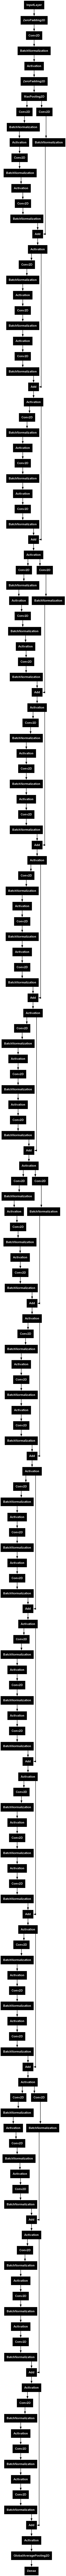

In [139]:
plot_model(model)

In [140]:
plot_model(model, 
           show_shapes = True,
           show_dtype = True,
           show_layer_names = True,
           expand_nested = True,
           dpi = 200,
           show_layer_activations = True,
           show_trainable = True,
           )

In [141]:
model.save('resnet50.h5')

In [142]:
# Feature Extraction -> Transfer Learning

from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [143]:
x = base_model.output
x1 = GlobalAveragePooling2D()(x) # We can do Dense layer aslo
x2 = Dense(1024, activation = 'relu')(x1)
prediction = Dense(10, activation = 'softmax')(x2)

model_feature = Model(inputs = base_model.input, outputs =  prediction)

In [144]:
# Freeze the base model and traning will be done in created layers x, x1, x2
# Unfreeze the base model and traning will be done in all layers

for layer in base_model.layers: # Frozen Layers
  layer.trainable = False

In [145]:
# Loss Function

model_feature.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [146]:
# Fine Tunning

model_fine = Model(inputs = base_model.input, outputs = prediction)

for layer in base_model.layers:
  layer.trainable = True

In [147]:
model_fine.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])